In [3]:
def load_model_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_sum.pt"))

def load_R2SP_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "R2SP_client_sum.pt"))

def load_server_to_client_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "sever_to_client_sum.pt"))

def load_client_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_loss.pt"))

def load_client_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_acc.pt"))

def load_client_size(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_size.pt"))

def load_client_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_client_time.pt"))

def load_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_acc.pt"))

def load_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.time"))


def load_ms(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_size.pt"))

def load_fed_avg_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_acc.pt"))

def load_fed_avg_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_loss.pt"))
def load_model_G(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_G.pt"))


%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# Create data
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from itertools import product
from utils.save_load import load



if os.getcwd().startswith('/mnt/sda1/mcj/PruneFL-master/PruneFL-master'):
    os.chdir('/mnt/sda1/mcj/PruneFL-master/PruneFL-master')

if os.getcwd().startswith("/data/mcj/Prune_fl"):
    os.chdir("/data/mcj/Prune_fl")

dataset_name = "TinyImageNet"
import configs.imagenet100 as config
client_sel = False
time_lim = (-1000, 60000)
acc_lim = (0.0, 0.9)
lottery_ticket_acc_lim = (0.7, 0.9)
n = 10

result_path = join("results", config.EXP_NAME)

In [4]:
import os
os.listdir(result_path)

['PIF_TINYIMAGENET2_[1.0, 0.7, 0.5]0.1__asyn__con_sub_fed_avg__n__100_0.1____ft_esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_iid__n__100_____esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__recover_polybuff_mask_fed_avg_Resdiual_iid__n__100_____esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__polybuff_mask_fed_avg_Resdiual_iid__n__100_____esc',
 'trash',
 'PIF_TINYIMAGENET2_[1.0, 0.7, 0.5]1.0__recover_con_sub_fed_avg__n__100_0.1____ft_esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__recover_polybuff_mask_fed_avg_Resdiual_iid__u__100_____esc',
 '.ipynb_checkpoints',
 'figs',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__100_____esc',
 '1',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]1.0__recover_polyfed_avg_iid__n__100_____esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__recover_polybuff_fed_avg_Resdiual_iid__n__100_____esc',
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__recover_polyb

In [20]:
exp = [
 'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedfix_niid__n__100_____esc',
#   'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.3__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__100_____esc',
     'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__100_____esc',
'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.2__asyn__recover_polybuff_fed_avg_Resdiual_niid__n__100_____esc',
#      'PIF_TINYIMAGENET2_[1.0, 0.6, 0.3, 0.1]0.5__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__100_____esc',

]

exp_legend = [
    'FedFix',

    'PR-FL',
    'fed-avg',
    'PR-FL',

   ]

linestyles = ['-','--', ':','-.',' ']

from cycler import cycler

#lr  -2 是增大学习率，大概是类似于增大本地跌打次数类似的效果


In [21]:

fig, ax = plt.subplots(nrows=1)
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)
# ax0.set_prop_cycle(custom_cycler)
for i in range(len(exp)):
    exp_name = exp[i]
    try:
#         acc = load_acc(exp_name)
#         acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_acc(exp_name)
        fed_avg_acc = load_fed_avg_acc(exp_name)
               
        time = load_time(exp_name)

        print(len(time),len(avg_acc))

        ax.plot(time,fed_avg_acc, linewidth=1, label=exp_legend[i])
#         if len(fed_avg_acc) != 0:
#             plt.plot(fed_avg_acc, linewidth=1, label='fed'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")
# plt.xlim([1,20])
# plt.ylim([0.90,0.98])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(True)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()
result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")
plt.savefig(join(fig_path, "FR-FL".format("_cs" if client_sel else "")), dpi=300)

<IPython.core.display.Javascript object>

487 487
345 345
140 140


<IPython.core.display.Javascript object>


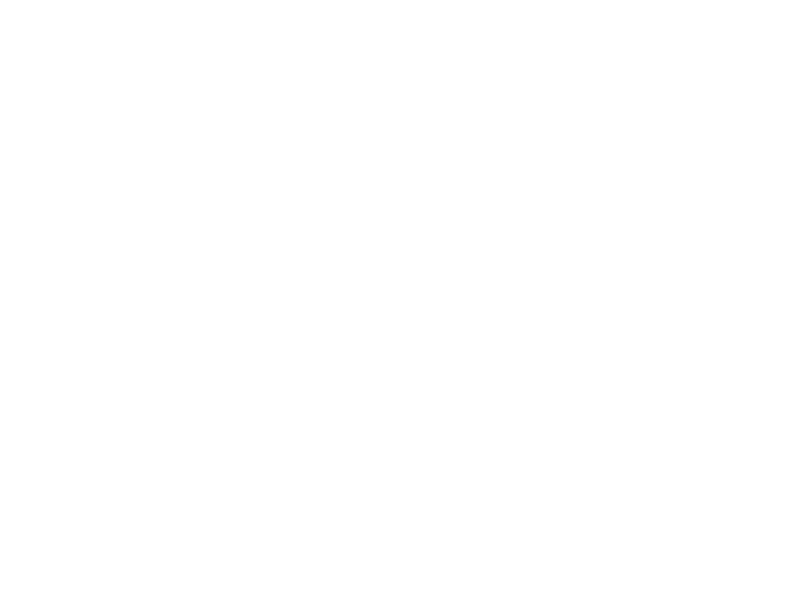

NameError: name 'client_acc' is not defined

In [82]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        client_sum = load_client_acc(exp_name)
        time = load_client_time(exp_name)

        for col in range(0,10,4):
            plt.plot(time[i],client_acc[col], label='c_s_'+str(exp_legend[i])+f'Column {col+1}')
    
    
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Client sum")

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>


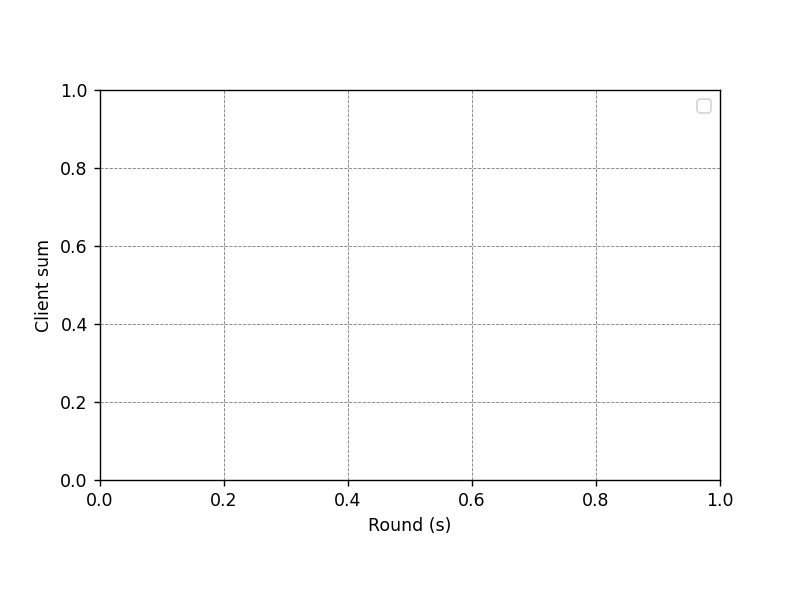

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.3]1.0__asyn__recover_con_sub_fed_avg__n__100_____ft_esc. Client selection = False.
Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.3]0.3__con_sub_fed_avg__n__100_____ft_esc. Client selection = False.
Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.3]0.3__asyn__con_sub_fed_avg__n__100_____ft_esc. Client selection = False.
Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.5]1.0__asyn__recover_con_sub_fed_avg__n__100_____ft_esc. Client selection = False.
Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.5]0.5__con_sub_fed_avg__n__100_____ft_esc. Client selection = False.
Skipping training results for TinyImageNet, PIF_TINYIMAGENET_[1.0, 0.5]0.5__asyn__con_sub_fed_avg__n__100_____ft_esc. Client selection = False.


In [64]:

plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        client_sum = load_server_to_client_sum(exp_name)
        client_sum = [[s.cpu().numpy() for s in cs] for cs in client_sum]

        client_acc = np.array(client_sum) 

        for col in range(0,10,4):
            plt.plot(client_acc[:, col], label='c_s_'+str(exp_legend[i])+f'Column {col+1}')
    
    
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Client sum")

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()
